#Tarefa de Regressão - parte 1

## Nesta tarefa, você deve carregar um dataset sobre tratores , construir modelos de Regressão com os algoritmos vistos em aula e predizer o preço de venda (SalesPrice).

Dica: Para toda a tarefa, além da biblioteca pandas e numpy, você pode querer explorar funções da biblioteca sklearn.ensemble (em particular o pacote RandomForestRegressor), sklearn.neighbors (KNeighborsRegressor) e sklearn.tree (DecisionTreeRegressor).
Além disso, você vai precisar usar funções de pré-processamento e de pós-procesamento (das bibliotecas sklearn.preprocessing, sklearn.model_selection e sklearn.metrics)

IMPORTANTE: Ao realizar etapas de pré-processamento, verifique se o procedimento funcionou.


###Importe os pacotes e carregue o arquivo com os dados
O dataset a ser utilizado encontra-se no arquivo **Tratores.csv**, disponível no EAD.


Este dataset contém dados sobre as vendas de tratores, descritas pelos seguintes atributos/variáveis:



*   SalesID: unique identifier of a particular sale of a machine at auction
*   MachineID: dentifier for a particular machine;  machines may have multiple sales
*   ModelID: identifier for a unique machine model
*   YearMade:year of manufacturer of the Machine
*   MachineHoursCurrentMeter: current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale
*   Saledate:  time of sale
*   Product Group: Identifier for top-level hierarchical grouping of fiModelDesc
*   **Saleprice (target)**:cost of sale in USD












In [32]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree




In [33]:
df = pd.read_csv('Tratores.csv',sep=',')
df.head()

,SalesID,SalePrice,MachineID,ModelID,YearMade,MachineHoursCurrentMeter,saledate,ProductGroup
0,1139246,66000,999089,3157,2004,68,11/16/2006 0:00,WL
1,1139248,57000,117657,77,1996,4640,3/26/2004 0:00,WL
2,1139249,10000,434808,7009,2001,2838,2/26/2004 0:00,SSL
3,1139251,38500,1026470,332,2001,3486,5/19/2011 0:00,TEX
4,1139253,11000,1057373,17311,2007,722,7/23/2009 0:00,SSL


### Pré-processe a base de dados

Dica: avalie a necessidade de converter os tipos das variáveis, normalizar os dados, ...

#### Transforme a variável saledate em três outras variáveis: ano, mês e dia. Adicione-as como colunas no dataset
 Dica: Uma passo inicial pode ser transformar a variável em *datetime*.

In [34]:
df['saledate'] = pd.to_datetime(df['saledate'])
df['Ano'] = df['saledate'].dt.year
df['Mês'] = df['saledate'].dt.month
df['Dia'] = df['saledate'].dt.day

df.head()

,SalesID,SalePrice,MachineID,ModelID,YearMade,MachineHoursCurrentMeter,saledate,ProductGroup,Ano,Mês,Dia
0,1139246,66000,999089,3157,2004,68,2006-11-16,WL,2006,11,16
1,1139248,57000,117657,77,1996,4640,2004-03-26,WL,2004,3,26
2,1139249,10000,434808,7009,2001,2838,2004-02-26,SSL,2004,2,26
3,1139251,38500,1026470,332,2001,3486,2011-05-19,TEX,2011,5,19
4,1139253,11000,1057373,17311,2007,722,2009-07-23,SSL,2009,7,23


#### Implemente outras etapas de pré-processamento que julgue necessárias.


In [35]:
missing_values = df.isnull().sum()

print("Valores ausentes em cada coluna:")
print(missing_values)

Valores ausentes em cada coluna:
SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
YearMade                    0
MachineHoursCurrentMeter    0
saledate                    0
ProductGroup                0
Ano                         0
Mês                         0
Dia                         0
dtype: int64


In [36]:
#normalizando colunas
scaler = MinMaxScaler()
df[['SalePrice', 'YearMade','MachineHoursCurrentMeter']] = scaler.fit_transform(df[['SalePrice', 'YearMade', 'MachineHoursCurrentMeter']])

In [37]:
df = pd.get_dummies(df, columns=['ProductGroup'])


In [38]:
df = df.replace({True: 1, False: 0})
print(df)

     SalesID  SalePrice  MachineID  ModelID  YearMade  \
0    1139246   0.449541     999089     3157  0.904762   
1    1139248   0.383486     117657       77  0.714286   
2    1139249   0.038532     434808     7009  0.833333   
3    1139251   0.247706    1026470      332  0.833333   
4    1139253   0.045872    1057373    17311  0.976190   
..       ...        ...        ...      ...       ...   
995  1142566   0.207339    1069733     5428  0.928571   
996  1142567   0.420183     531918    23162  0.928571   
997  1142568   0.023853    1064508    17472  0.761905   
998  1142577   0.082569    1046210    13391  0.904762   
999  1142582   0.071560    1031625     9578  0.952381   

     MachineHoursCurrentMeter   saledate   Ano  Mês  Dia  ProductGroup_BL  \
0                    0.001799 2006-11-16  2006   11   16                0   
1                    0.122764 2004-03-26  2004    3   26                0   
2                    0.075087 2004-02-26  2004    2   26                0   
3      

### Crie os conjuntos de treinamento e de teste

Atenção: Selecione aleatoriamente e sem reposição (para que não se repitam) 75% das observações para o conjunto de treinamento. As 25% observações restantes serão usadas para o conjunto de teste. Fixe a semente de geração de dados aleatórios.

In [39]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=50)

print("Tamanho do conjunto (treinamento):", len(train_df))
print("Tamanho do conjunto (teste):", len(test_df))

Tamanho do conjunto (treinamento): 750
Tamanho do conjunto (teste): 250


### Construa modelos de KNN, Árvore para Regressão e Random Forest.

Utilizando cada um deles, faça a predição do atributo SalePrice no conjunto teste.

In [40]:
#knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# separando features e o target
X_train_knn = train_df.drop(columns=['SalePrice', 'saledate'])
y_train_knn = train_df['SalePrice']
X_test_knn = test_df.drop(columns=['SalePrice', 'saledate'])

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_knn, y_train_knn)

# predições
y_pred_knn = knn_model.predict(X_test_knn)


In [41]:
print(y_pred_knn)

[0.29541284 0.24183486 0.20440367 0.26018349 0.20366972 0.29908257
 0.36733945 0.0293578  0.06715596 0.15963303 0.09357798 0.11119266
 0.19119266 0.10605505 0.39082569 0.19486239 0.24183486 0.10091743
 0.27266055 0.28146789 0.18165138 0.22862385 0.25284404 0.10605505
 0.20256881 0.20733945 0.2359633  0.09798165 0.0187156  0.27706422
 0.20366972 0.09394495 0.20513761 0.39229358 0.42752294 0.21981651
 0.29174312 0.23743119 0.18311927 0.07302752 0.25027523 0.20587156
 0.14422018 0.23522936 0.42752294 0.2866055  0.07522936 0.06201835
 0.20733945 0.29541284 0.15522936 0.23522936 0.37027523 0.10348624
 0.22055046 0.09724771 0.26311927 0.2        0.24550459 0.14422018
 0.04807339 0.05908257 0.16183486 0.4906422  0.29321101 0.13174312
 0.17798165 0.26385321 0.08954128 0.12807339 0.26311927 0.2146789
 0.10605505 0.16550459 0.39229358 0.17504587 0.18825688 0.20366972
 0.14311927 0.24917431 0.09651376 0.18899083 0.26018349 0.2293578
 0.25431193 0.20733945 0.15963303 0.14862385 0.14422018 0.241467

In [42]:
#arvore de regressao
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_knn, y_train_knn)

# predições
y_pred_dt = dt_model.predict(X_test_knn)


In [43]:
print(y_pred_dt)

[0.15963303 0.11559633 0.00917431 0.14862385 0.17798165 0.43486239
 0.42752294 0.05688073 0.66972477 0.09724771 0.08256881 0.10458716
 0.05688073 0.15229358 0.48623853 0.2733945  0.37614679 0.07889908
 0.17431193 0.28807339 0.36146789 0.2440367  0.24770642 0.56697248
 0.25137615 0.59633028 0.29541284 0.56697248 0.08623853 0.14862385
 0.42752294 0.07889908 0.04587156 0.44954128 0.10091743 0.25137615
 0.26605505 0.05321101 0.83119266 0.43486239 0.06055046 0.05321101
 0.02752294 0.07155963 0.17431193 0.06422018 0.44220183 0.04587156
 0.58899083 0.05321101 0.76513761 0.16330275 0.47889908 0.08990826
 0.03853211 0.45688073 0.42018349 0.1853211  0.20733945 0.23669725
 0.2        0.04587156 0.07522936 0.12293578 0.19633028 0.08256881
 0.17798165 0.10091743 0.05321101 0.16330275 0.14495413 0.1412844
 0.1853211  0.66238532 0.2733945  0.07889908 0.02385321 0.05688073
 0.20733945 0.1266055  0.79449541 0.1266055  0.13394495 0.25137615
 0.2293578  0.65504587 0.08256881 0.2        0.18899083 0.16330

In [44]:
#random forest
from sklearn.ensemble import RandomForestRegressor

# Construindo e treinando o modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_knn, y_train_knn)

# Fazendo predições no conjunto de teste
y_pred_rf = rf_model.predict(X_test_knn)

In [45]:
print(y_pred_rf)

[0.22176147 0.11080734 0.02831193 0.23207339 0.29658716 0.34649541
 0.37009174 0.05979817 0.37622018 0.19056881 0.18113761 0.23027523
 0.06411009 0.20381651 0.38895413 0.36458716 0.29491743 0.21126606
 0.18744954 0.17633028 0.4172844  0.37416514 0.30245872 0.39691743
 0.34062385 0.42372477 0.29930275 0.37825688 0.07326606 0.38645872
 0.27283303 0.04337615 0.15658716 0.31155963 0.0693211  0.35933945
 0.32649541 0.06625688 0.6866789  0.44005505 0.22387156 0.09760367
 0.02517431 0.12645872 0.19834862 0.04699083 0.31823853 0.07557798
 0.31266055 0.06423853 0.41581651 0.19155963 0.34187156 0.24590826
 0.06517431 0.22897248 0.22286239 0.26453211 0.17691743 0.40422018
 0.25922936 0.30388991 0.07618349 0.25144954 0.19111927 0.06998165
 0.32363303 0.29544954 0.02715596 0.17023853 0.14565138 0.20344954
 0.20884404 0.38433028 0.36029358 0.11594495 0.0440367  0.04886239
 0.18012844 0.14322936 0.40607339 0.1586789  0.16440367 0.22722936
 0.21992661 0.3493945  0.09394495 0.23363303 0.2226422  0.2546

### Pós-processamento: Avalie cada modelo de regressão

Calcule as medidas de desempenho vistas em aula ( raiz do erro quadrático médio, R2)

In [46]:
# knn --> erro quadrático médio (MSE) no conjunto de teste
mse_knn = mean_squared_error(test_df['SalePrice'], y_pred_knn)
print("Erro quadrático médio (MSE) -> KNN:", mse_knn)

# arvore de decisao --> erro quadrático médio (MSE) no conjunto de teste
mse_dt = mean_squared_error(test_df['SalePrice'], y_pred_dt)
print("MSE-> Árvore de Decisão:", mse_dt)

# random forest --> erro quadrático médio (MSE) no conjunto de teste
mse_rf = mean_squared_error(test_df['SalePrice'], y_pred_rf)
print("MSE -> Random Forest:", mse_rf)

Erro quadrático médio (MSE) -> KNN: 0.03860644367039811
MSE-> Árvore de Decisão: 0.019336321993098225
MSE -> Random Forest: 0.015984602812019185


In [47]:
from sklearn.metrics import r2_score

# raiz quadrada do erro quadrático médio (RMSE)
rmse_knn = np.sqrt(mse_knn)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)

print("Raiz do Erro Quadrático Médio (RMSE) -->  KNN:", rmse_knn)
print("Raiz do Erro Quadrático Médio (RMSE) -->  Árvore de Decisão:", rmse_dt)
print("Raiz do Erro Quadrático Médio (RMSE) --> Random Forest:", rmse_rf)


Raiz do Erro Quadrático Médio (RMSE) -->  KNN: 0.19648522506895552
Raiz do Erro Quadrático Médio (RMSE) -->  Árvore de Decisão: 0.13905510416053854
Raiz do Erro Quadrático Médio (RMSE) --> Random Forest: 0.12643022902778903


In [48]:
#  coeficiente de determinação (R²)
r2_knn = r2_score(test_df['SalePrice'], y_pred_knn)
r2_dt = r2_score(test_df['SalePrice'], y_pred_dt)
r2_rf = r2_score(test_df['SalePrice'], y_pred_rf)

print("Coeficiente de Determinação (R²) --> KNN:", r2_knn)
print("Coeficiente de Determinação (R²) --> Árvore de Decisão:", r2_dt)
print("Coeficiente de Determinação (R²) --> Random Forest:", r2_rf)

Coeficiente de Determinação (R²) --> KNN: -0.07620418814807217
Coeficiente de Determinação (R²) --> Árvore de Decisão: 0.46097519652378294
Coeficiente de Determinação (R²) --> Random Forest: 0.5544086723178586


#### Qual modelo apresentou melhor desempenho segundo as métricas calculadas?

O Erro Quadrático Médio (MSE) é uma métrica que mede a média dos quadrados dos erros. Logo, quanto menor o RMSE, melhor o desempenho do modelo. Além disso, quanto maior o R² ,  melhor a capacidade de previsão do modelo em relação aos outros. Sendo assim, como o Random Forest tem menor RMSE e maior R^2, ele possui melhor desempenho.

#### Avalie a importância dos atributos (feature importances) na construção dos modelos de Árvore de Decisão e Random Forest Regressor.

Diga os três atributos que apresentaram maior relevância na predição de cada modelo.



Feature Importances: AR

In [49]:
importances_dt = dt_model.feature_importances_

importances_dt_df = pd.DataFrame({'atributo': X_train_knn.columns, 'importância': importances_dt})
importances_dt_df = importances_dt_df.sort_values(by='importância', ascending=False)

print(" três atributos mais importantes --> Árvore de Decisão :")
importances_dt_df.head(3)

 três atributos mais importantes --> Árvore de Decisão :


,atributo,importância
4,MachineHoursCurrentMeter,0.195782
10,ProductGroup_SSL,0.166642
3,YearMade,0.124379


Feature Importances Random forest

In [50]:

importances_rf = rf_model.feature_importances_

importances_rf_df = pd.DataFrame({'atributo': X_train_knn.columns, 'importância': importances_rf})
importances_rf_df = importances_rf_df.sort_values(by='importância', ascending=False)

print(" três atributos mais importantes --> Random Forest:")
importances_rf_df.head(3)

 três atributos mais importantes --> Random Forest:


,atributo,importância
10,ProductGroup_SSL,0.165323
4,MachineHoursCurrentMeter,0.146476
2,ModelID,0.136366


#### Elabore um gráfico para visualizar a árvore de regressão, utilizando a biblioteca dtreeviz (precisa ser instalada). (EXTRA)

Para isso, treinem novamente o modelo de árvore de regressão, estipulando como parâmetro de máxima profundidade da árvore (max_depth) um número até 4.

Essa visualização é muito interessante e nos mostra a distribuição do atributo de decisão em cada nó e a distribuição e a média da resposta da folha.

In [51]:
!pip install -U dtreeviz
import dtreeviz



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


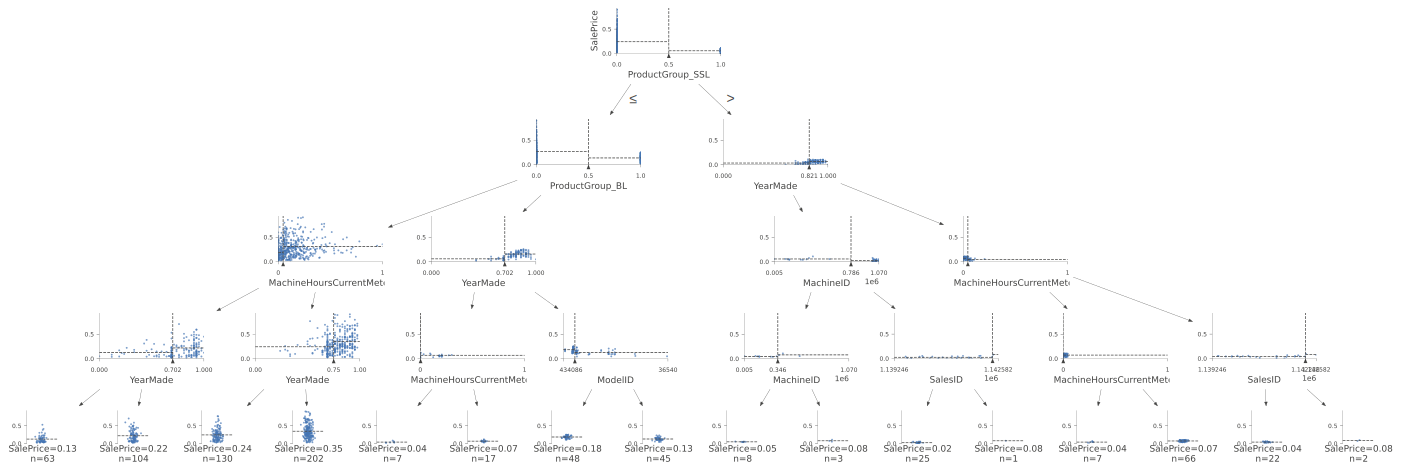

In [52]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

# não produzir warning "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)


# separando o dataset em treino e teste
train_df, test_df = train_test_split(df, test_size=0.25, random_state=50)

X_train_dt = train_df.drop(columns=['SalePrice', 'saledate'])
y_train_dt = train_df['SalePrice']
X_test_dt = test_df.drop(columns=['SalePrice', 'saledate'])

#parâmetro de máxima profundidade da árvore (max_depth) um número até 4
max_depth = 4
dt_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

# Visualização do gráfico
viz = dtreeviz.model(
    dt_model,
    X_train_dt,
    y_train_dt,
    target_name='SalePrice',
    feature_names=X_train_dt.columns

)

viz.view()


